<a href="https://colab.research.google.com/github/Avadhoot-Ganoo/CV_Expriments/blob/main/CV_midterm_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving image1.jpg to image1.jpg
GLCM Features:
Contrast: 285.243977889028
Energy: 0.020191285229479217
Homogeneity: 0.1416101970759625
Correlation: 0.8230547132244033
Identified Floor Type: Rough Surface (Concrete, Asphalt)


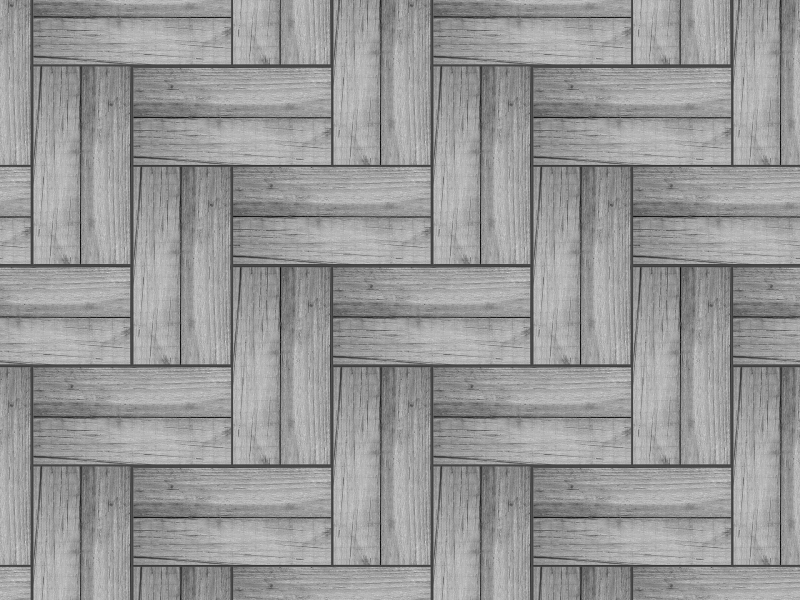

Uploaded Image


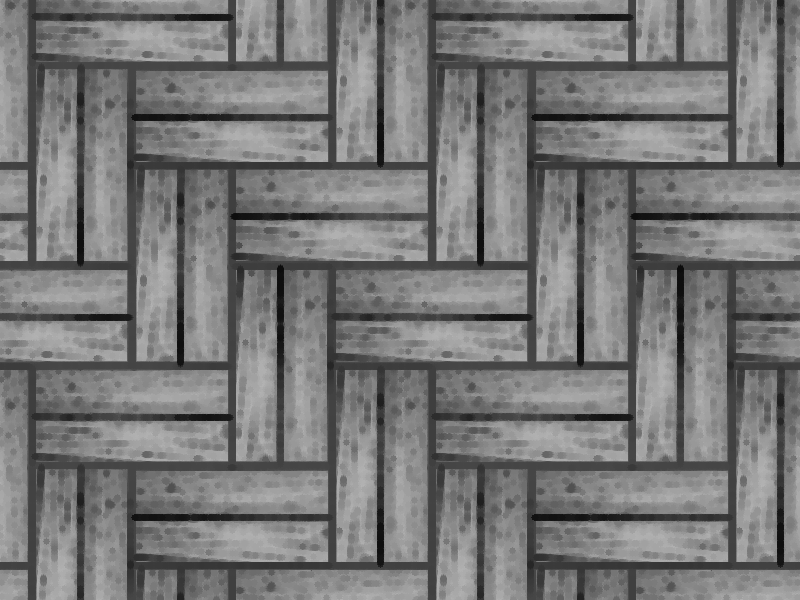

Eroded Image


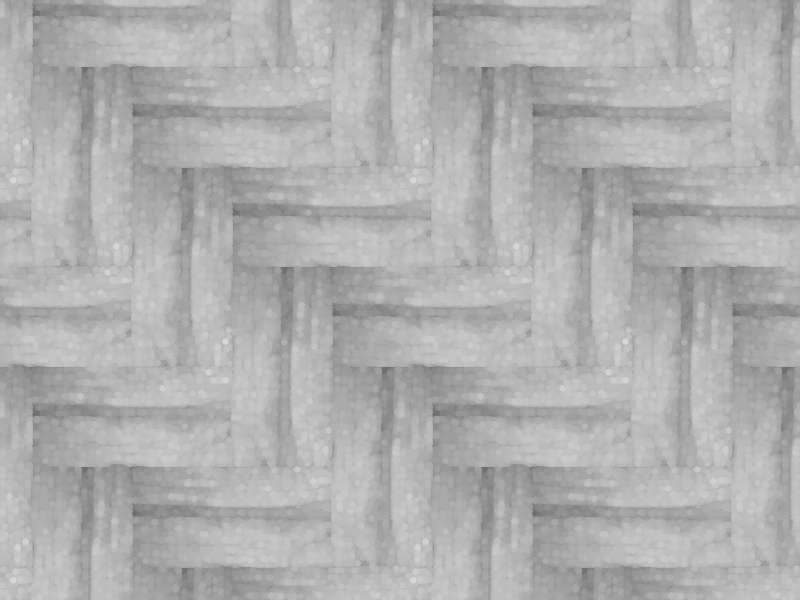

Dilated Image


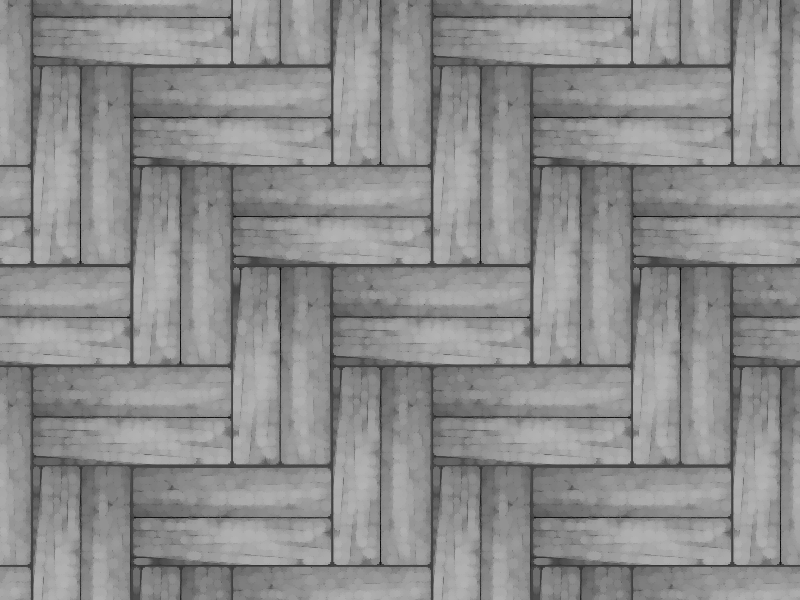

Opened Image


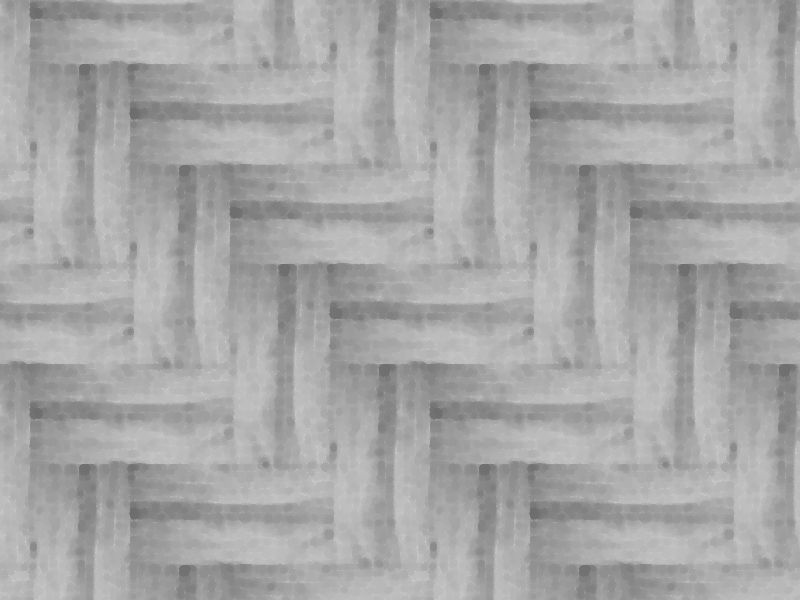

Closed Image


In [1]:
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from skimage.morphology import erosion, dilation, opening, closing, disk
from google.colab.patches import cv2_imshow
from google.colab import files
from PIL import Image

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load and preprocess the image
image = Image.open(image_path).convert('L')  # Convert to grayscale
image = np.array(image)  # Convert to NumPy array

if image is None or image.size == 0:
    raise ValueError("Image not found or cannot be loaded. Please check the path.")

# Extract GLCM features
def extract_glcm_features(image, distances=[1], angles=[0]):
    glcm = graycomatrix(image, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)
    features = {
        'contrast': graycoprops(glcm, 'contrast')[0, 0],
        'energy': graycoprops(glcm, 'energy')[0, 0],
        'homogeneity': graycoprops(glcm, 'homogeneity')[0, 0],
        'correlation': graycoprops(glcm, 'correlation')[0, 0]
    }
    return features

def classify_texture(features):
    """ Classify the floor texture based on GLCM features."""
    if features['contrast'] < 100 and features['homogeneity'] > 0.5:
        return "Smooth Surface (Tile, Marble)"
    elif features['contrast'] > 100 and features['energy'] < 0.2:
        return "Rough Surface (Concrete, Asphalt)"
    elif features['homogeneity'] > 0.7 and features['energy'] > 0.3:
        return "Carpet or Fabric Surface"
    else:
        return "Unknown Surface Type"

def apply_morphological_operations(image):
    """ Apply morphological operations: erosion, dilation, opening, and closing."""
    kernel = disk(3)
    return {
        'eroded': erosion(image, kernel),
        'dilated': dilation(image, kernel),
        'opened': opening(image, kernel),
        'closed': closing(image, kernel)
    }

# Analyze image
features = extract_glcm_features(image)
texture_type = classify_texture(features)
morph_results = apply_morphological_operations(image)

# Output results
print("GLCM Features:")
for key, value in features.items():
    print(f"{key.capitalize()}: {value}")
print(f"Identified Floor Type: {texture_type}")

# Display images
cv2_imshow(image)
print("Uploaded Image")
for key, img in morph_results.items():
    cv2_imshow(img)
    print(f"{key.capitalize()} Image")
